In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(plyr))
library(pheatmap)
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [2]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [3]:
meta_data=read.csv("/home/jupyter/BRI_Figures_Final_V2/Dataset/SF4_meta_data-2024-05-05.csv")
meta_data$ageAtEnrollment[meta_data$ageAtEnrollment == '89+'] <- '90'
meta_data$ageAtEnrollment<-as.numeric(meta_data$ageAtEnrollment)
meta_data<-meta_data[!is.na(meta_data$ageAtEnrollment),]
meta_data$Ages<-meta_data$ageAtEnrollment
meta_data <- meta_data[!duplicated(meta_data$sample.sampleKitGuid, fromLast = TRUE), ]
rownames(meta_data)<-meta_data$sample.sampleKitGuid

In [4]:
df_input<-read.csv("05_Extract_Mean_Expression/Up_Selected_Genes.csv",row.names = 1)

In [5]:
df_input_wide <- df_input[c('Gene','Mean_Expression','pbmc_sample_id')] %>%
  pivot_wider(names_from = pbmc_sample_id, values_from = Mean_Expression) %>% as.data.frame()

In [6]:
rownames(df_input_wide)<-df_input_wide$Gene

In [7]:
df_input_wide

,Gene,PB03173-001,PB03180-001,PB03195-001,PB03199-003,PB03203-003,PB03146-001,PB03147-001,PB03152-001,PB03156-001,⋯,PB03333-003,PB03321-003,PB03320-003,PB03315-003,PB03304-003,PB03296-001,PB03293-003,PB03210-003,PB03209-003,PB03207-003
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IRF3,IRF3,1.1903974,1.0644003,1.0975732,1.1195974,1.0676592,1.0427128,0.89850119,1.0661636,1.0548625,⋯,1.3396641,1.2442234,1.3269551,1.3025364,1.3404040,1.0770234,1.2827030,1.1944097,1.0917149,1.3055304
ID3,ID3,0.2251038,0.2136842,0.2820865,0.1844021,0.1673685,0.1073331,0.09798812,0.1903999,0.2089436,⋯,0.2211719,0.1964474,0.2577631,0.1129271,0.0000000,0.1924534,0.1048936,0.2040562,0.2169008,0.2752191
LGALS1,LGALS1,0.3674502,0.1943014,0.2857434,0.2405386,0.1680182,0.1633414,0.36988288,0.2656332,0.4018186,⋯,0.2522578,0.3970453,0.3358070,0.1624765,0.2900857,0.2894179,0.2038661,0.3492907,0.3133983,0.2995798
GZMK,GZMK,0.3405368,0.1622969,0.2993325,0.3077026,0.2603327,0.3382257,0.29875429,0.4154397,0.1300459,⋯,0.1087148,0.3896169,0.2316252,0.3372377,0.1445742,0.2762748,0.5111800,0.5157790,0.3827629,0.5338199


In [8]:
meta_data<-meta_data %>% filter(pbmc_sample_id %in% colnames(df_input_wide))%>% 
arrange(Ages)

In [9]:
df_input_wide<-df_input_wide[meta_data$pbmc_sample_id]

In [33]:
annotation<-meta_data %>% select(Ages)
rownames(annotation)<-meta_data$pbmc_sample_id

In [18]:
row_annotation<-as.data.frame(rownames(df_input_wide))
row_annotation$Group<-c("Core naive CD4 T cell","Core naive CD8 T cell",
                    "CM CD4 T cell","GZMB- CD27+ EM CD4 T cell")
rownames(row_annotation)<-rownames(df_input_wide)
row_annotation<-row_annotation["Group"]

In [19]:
breaks_sequence <- seq(-1, 1, length.out = 100)

png 
  2

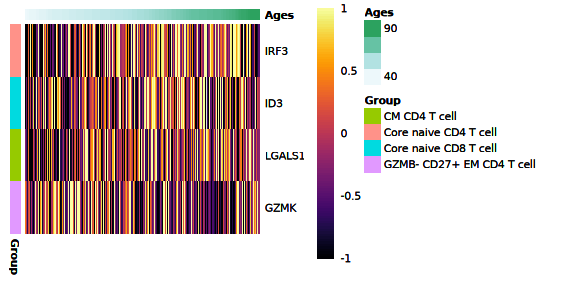

In [48]:
options(repr.plot.width = 120/25.4, repr.plot.height =  60/25.4)

p<-pheatmap(df_input_wide[rownames(annotation)], 
         breaks=breaks_sequence,
         cluster_rows=FALSE,
         annotation=annotation,
         annotation_row=row_annotation,
         fontsize = 6,
         cluster_cols=FALSE,
         show_colnames=FALSE,color= 
            inferno(100),
         border_color=NA,
         scale='row')
p

save_pheatmap(p,' ', width=120/25.4, height=60/25.4)